In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
import io

df = pd.read_csv(io.BytesIO(uploaded['Pharmaceuticals.csv']),index_col=0)
df.count()

**a.Use only the numerical variables (1 to 9) to cluster the 21 firms. Justify the various choices made in conducting the cluster analysis, such as weights for different variables, the specific clustering algorithm(s) used, the number of clusters formed, and so on.**

In [3]:
#Collect only the quantitative variables (1-9) to cluster the 21 firms
df.head()
#Pharmasutical_data = df[]
col_val=[i for i in range(1,10)]
col_val
Pharmasutical_data = df[df.columns[col_val]]
Pharmasutical_data.count()
#Scale all the quantitative variables in the dataframe.
from sklearn import preprocessing
Pharmasutical_data_Norm = Pharmasutical_data.apply(preprocessing.scale, axis=0)

*Choosing the appropriate value of K

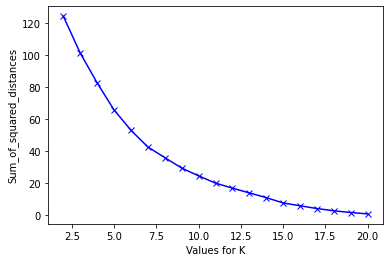

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
for i in range(2,len(Pharmasutical_data_Norm.index)):
  km = KMeans(n_clusters=i,init ='k-means++', max_iter=300, n_init=10,random_state=0 )
  km = km.fit(Pharmasutical_data_Norm)
  Sum_of_squared_distances.append(km.inertia_)
K_values= range(2,len(Pharmasutical_data_Norm.index))
plt.plot(K_values, Sum_of_squared_distances, 'bx-')
plt.xlabel('Values for K')
plt.ylabel('Sum_of_squared_distances')
plt.show()

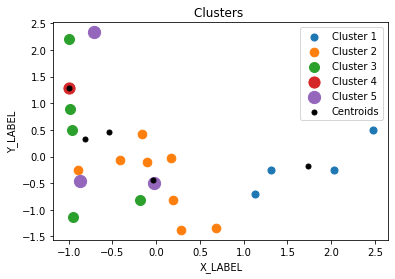

In [22]:
#K-Means Cluster Analysis - Fit the data with 5 clusters
import numpy as np
means=KMeans(n_clusters=5,init ='k-means++', max_iter=300, n_init=10,random_state=0 )
datafit = means.fit_predict(Pharmasutical_data_Norm)
import pandas as pd
Pharmasutical_data_Norm["Cluster"]= (datafit)
N_data=Pharmasutical_data_Norm.values
import matplotlib.pyplot as plt
#6 Visualising the clusters
clusterSize=[50,75,100,125,150]
for i in range(5):
    plt.scatter(N_data[datafit==i, 0], N_data[datafit==i, 1], s=clusterSize[i], label =('Cluster '+str(i+1)))
plt.scatter(means.cluster_centers_[:, 0], means.cluster_centers_[:, 1], s=25, c='black', label = 'Centroids')
plt.title('Clusters ')
plt.xlabel('X_LABEL')
plt.ylabel('Y_LABEL')
plt.legend()
plt.show()

**b.Interpret the clusters with respect to the numerical variables used in forming the clusters.**

In [23]:
Data= Pharmasutical_data_Norm.groupby('Cluster')
Data=Data.groups
#Each Index of each cluster
for i in Data:
  print('Cluster'+str(i+1)+':'+str(Data[i]))
#Analyzing each cluster  
Data= Pharmasutical_data_Norm.groupby('Cluster').agg('mean')
Data

Cluster1:Index(['GSK', 'JNJ', 'MRK', 'PFE'], dtype='object', name='Symbol')
Cluster2:Index(['ABT', 'AHM', 'AZN', 'BMY', 'LLY', 'NVS', 'SGP', 'WYE'], dtype='object', name='Symbol')
Cluster3:Index(['AVE', 'ELN', 'IVX', 'MRX', 'WPI'], dtype='object', name='Symbol')
Cluster4:Index(['CHTT'], dtype='object', name='Symbol')
Cluster5:Index(['AGN', 'BAY', 'PHA'], dtype='object', name='Symbol')


,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Cluster,,,,,,,,,
0,1.737454,-0.182453,-0.203359,1.265486,1.383690,1.181641e+00,-0.479637,0.478716,0.605843
1,-0.032198,-0.446868,-0.325083,0.199863,0.418477,1.772462e-01,-0.281272,-0.721541,0.570708
2,-0.815718,0.328416,-0.461257,-0.669448,-0.807657,-1.134376e+00,0.278415,1.255886,-0.152288
3,-1.000888,1.294279,0.033806,-0.115154,-1.196630,-4.726566e-01,3.835226,-0.648387,-1.279725
4,-0.537584,0.456134,1.895526,-1.066149,-1.215887,-3.330669e-16,-0.352858,-0.591193,-1.649292


Answer: 
**  HERE CLUSTER 0 IS ACTUALLY CLUSTER 1 AND SAME AS FOR OTHER CLUSTER**

Cluster 1: HAS HIGHEST MARKET_CAP, highest ROE, highest ROA, lowest Leverage, highest Net_Profit_Margin.

Cluster 2: HAS LOWEST Beta, highest Asset_Turnover, lowest Rev_Growth

Cluster 3: Has lowest PE_RATIO, highest Rev_Growth, , highest Asset Turnover

Cluster 4: HAS LOWEST MARKET_CAP, Highest Beta, lowest Asset_Turnover, highest Leverage,

Cluster 5: HAS HIGHEST PE_RATIO,lowest ROE, lowest ROA, lowest Net_Profit_Margin.

**c.Is there a pattern in the clusters with respect to the numerical variables (10 to 12)? (those not used in forming the clusters)**

Answer:
In terms of the Media recommendation variable, there is a pattern in the clusters.
Cluster 4 has mostly Hold recommendations, with the highest Net Profit Margin, lowest Beta, lowest PE Ratio, and lowest Rev growth.
There is no Sell Media recommendation for Cluster 3 but it has the highest Market Cap, highest ROE, highest ROA, and highest Asset Turnover. Cluster 3 consists primarily of buy recommendations, with one particularly strong buy recommendation. Cluster 2 has mostly Hold recommendations, with the highest PE ratio, lowest ROE, lowest ROA, lowest Asset Turnover, and lowest Net Profit Margin.


**d.Provide an appropriate name for each cluster using any or all of the variables in the dataset.**

Answer: Various clusters can be identified based on their quantitative variable dependence. Can be seen in below Scatter plot.

Cluster 1 - HIGHEST MARKET_CAP, ROE, ROA,  Net_Profit_Margin and Lowest Leverage

Cluster 2 - LOWEST Beta, Rev_Growth

Cluster 3 - Highest Rev_Growth, Asset Turnover 

Cluster 4 - Highest Beta, Leverage

Cluster 5 - lowest ROE, ROA, Net_Profit_Margin.